In [96]:
import codecs
import json
import re
import requests

from bs4 import BeautifulSoup
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from highlight_text import fig_text
import matplotlib as mpl
from mplsoccer.pitch import Pitch,VerticalPitch

In [147]:
PATTERN = r"{}\s+=\s+JSON.parse\(\'(.*?)\'\)"
headers = {
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
    'accept-encoding': 'gzip, deflate',
    'accept-language': 'en-GB,en-US;q=0.9,en;q=0.8,ml;q=0.7',
    'upgrade-insecure-requests': '1',
    'user-agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.88 Safari/537.36',
}
def fetch(url):

    with requests.get(url,headers=headers) as response:
        return response.text

def find_match(scripts, pattern):

    for script in scripts:
        match = re.search(pattern, script.string)
        if match:
            break
    return match

def decode_data(match):

    byte_data = codecs.escape_decode(match.group(1))
    json_data = json.loads(byte_data[0].decode("utf-8"))

    return json_data

def get_data(url):

    html = fetch(url)
    soup = BeautifulSoup(html, "html.parser")
    scripts = soup.find_all("script")

    pattern = re.compile(PATTERN.format('shotsData'))
    match = find_match(scripts, pattern)
    data = decode_data(match)
    return data


url = 'https://understat.com/match/14811'

data = get_data(url)

In [ ]:
data

In [13]:
df = pd.DataFrame(data['h'])
df['team']='Manchester City'
df_city = df[['minute', 'team','xG','player','result','X','Y']]

df = pd.DataFrame(data['a'])
df['team']='Everton'
df_everton = df[['minute', 'team','xG','player','result','X','Y']]

In [14]:
df = df_city. append(df_everton, ignore_index=True)


In [45]:
df_city

,minute,team,xG,player,result,X,Y
0,5,Manchester City,0.114252,Gabriel Jesus,SavedShot,0.949,0.337
1,7,Manchester City,0.107345,John Stones,MissedShots,0.916,0.548
2,10,Manchester City,0.024201,Kevin De Bruyne,Goal,0.768,0.620
3,13,Manchester City,0.411929,Gabriel Jesus,Goal,0.886,0.597
4,22,Manchester City,0.027450,Riyad Mahrez,MissedShots,0.863,0.355
5,22,Manchester City,0.050799,Kevin De Bruyne,SavedShot,0.913,0.699
6,40,Manchester City,0.068471,Oleksandr Zinchenko,BlockedShot,0.869,0.635
7,42,Manchester City,0.053949,Riyad Mahrez,ShotOnPost,0.796,0.555
8,51,Manchester City,0.127007,Phil Foden,BlockedShot,0.860,0.462
9,51,Manchester City,0.039999,Rúben Dias,SavedShot,0.842,0.536


In [40]:
# df = df.apply(pd.to_numeric,errors='ignore')
df_city = df_city.apply(pd.to_numeric,errors='ignore')

In [41]:
df_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   minute  21 non-null     int64  
 1   team    21 non-null     object 
 2   xG      21 non-null     float64
 3   player  21 non-null     object 
 4   result  21 non-null     object 
 5   X       21 non-null     float64
 6   Y       21 non-null     float64
dtypes: float64(3), int64(1), object(3)
memory usage: 1.3+ KB


In [110]:
text_color = 'w'

In [111]:
df_city

,minute,team,xG,player,result,X,Y
0,5,Manchester City,0.114252,Gabriel Jesus,SavedShot,0.949,0.337
1,7,Manchester City,0.107345,John Stones,MissedShots,0.916,0.548
2,10,Manchester City,0.024201,Kevin De Bruyne,Goal,0.768,0.620
3,13,Manchester City,0.411929,Gabriel Jesus,Goal,0.886,0.597
4,22,Manchester City,0.027450,Riyad Mahrez,MissedShots,0.863,0.355
5,22,Manchester City,0.050799,Kevin De Bruyne,SavedShot,0.913,0.699
6,40,Manchester City,0.068471,Oleksandr Zinchenko,BlockedShot,0.869,0.635
7,42,Manchester City,0.053949,Riyad Mahrez,ShotOnPost,0.796,0.555
8,51,Manchester City,0.127007,Phil Foden,BlockedShot,0.860,0.462
9,51,Manchester City,0.039999,Rúben Dias,SavedShot,0.842,0.536


In [112]:
from mplsoccer import Pitch, VerticalPitch
import matplotlib.pyplot as plt

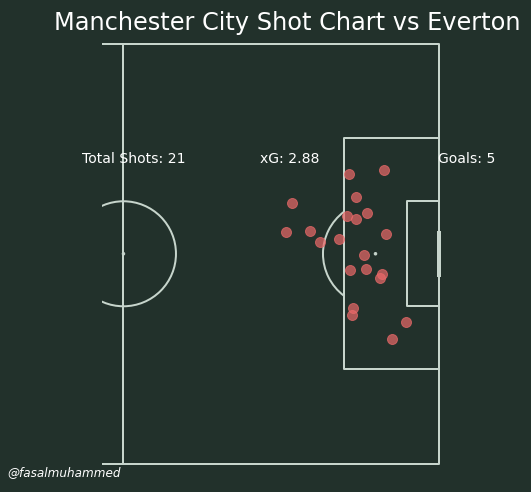

In [146]:
fig, ax = plt.subplots(figsize=(13,8.5))
fig.set_facecolor('#22312b')
ax.patch.set_facecolor('#22312b')

#The statsbomb pitch from mplsoccer
pitch = Pitch(pitch_type='statsbomb', orientation='',
              pitch_color='#22312b', line_color='#c7d5cc', figsize=(13, 8),
              constrained_layout=False, tight_layout=True, half=True)

pitch.draw(ax=ax)

#I invert the axis to make it so I am viewing it how I want
plt.gca().invert_yaxis()

# #plot the points, you can use a for loop to plot the different outcomes if you want
plt.scatter(df_city['X']*120,df_city['Y']*80, s=100,c='#ea6969',alpha=.7)

s='Manchester City Shot Chart vs Everton'
fig_text(s=s,
        x=.27,y=.9,
        fontfamily='Andale Mono',
#         highlight_weights=['bold'],
        fontsize=24,
        color=text_color

)

total_shots = len(df_city)

fig_text(s=f'Total Shots: {total_shots}',
        x=.30, y =.67, fontsize=14,fontfamily='Andale Mono',color=text_color)
fig_text(s=f'xG: 2.88',
        x=.49, y =.67, fontsize=14,fontfamily='Andale Mono',color=text_color)
fig_text(s=f'Goals: 5',
        x=.68, y =.67, fontsize=14,fontfamily='Andale Mono',color=text_color)

fig.text(.22,.14,f'@fasalmuhammed',fontstyle='italic',fontsize=12,fontfamily='Andale Mono',color=text_color)

plt.savefig('ManchesterCityVsEvertonShotmap.png',dpi=300,bbox_inches = 'tight',facecolor='#22312b')